In [7]:
import pandas as pd

In [22]:
github_raw_url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv'
df = pd.read_csv(github_raw_url)

In [23]:
print(df.head(25))

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.4             0.700         0.00             1.9      0.076   
1             7.8             0.880         0.00             2.6      0.098   
2             7.8             0.760         0.04             2.3      0.092   
3            11.2             0.280         0.56             1.9      0.075   
4             7.4             0.700         0.00             1.9      0.076   
5             7.4             0.660         0.00             1.8      0.075   
6             7.9             0.600         0.06             1.6      0.069   
7             7.3             0.650         0.00             1.2      0.065   
8             7.8             0.580         0.02             2.0      0.073   
9             7.5             0.500         0.36             6.1      0.071   
10            6.7             0.580         0.08             1.8      0.097   
11            7.5             0.500         0.36    

In [24]:
print(df.isnull().sum().sum())

0


In [25]:
cutoff = 8

In [29]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [31]:
df['is_good'] = (df['quality'] >= cutoff).astype(int)

In [32]:
missing_values = df.isnull().sum()

In [34]:
df.fillna(df.mean(), inplace=True)

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

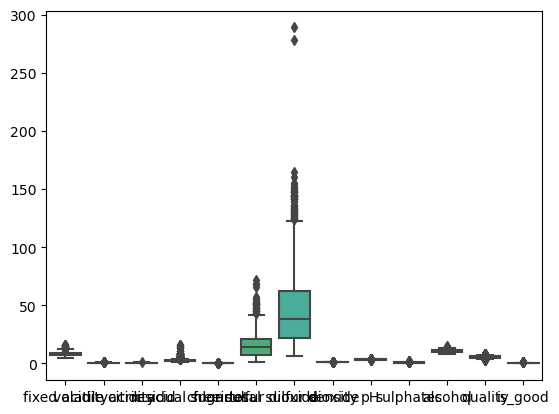

In [36]:
sns.boxplot(data=df)
plt.show()

In [37]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [38]:
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
X = df.drop(['quality', 'is_good'], axis=1)
y = df['is_good']

In [41]:
dt_classifier = DecisionTreeClassifier()

In [42]:
dt_classifier.fit(X, y)

DecisionTreeClassifier()

In [44]:
feature_importances_dt = dt_classifier.feature_importances_

In [53]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [57]:
feature_importances = dt_classifier.feature_importances_

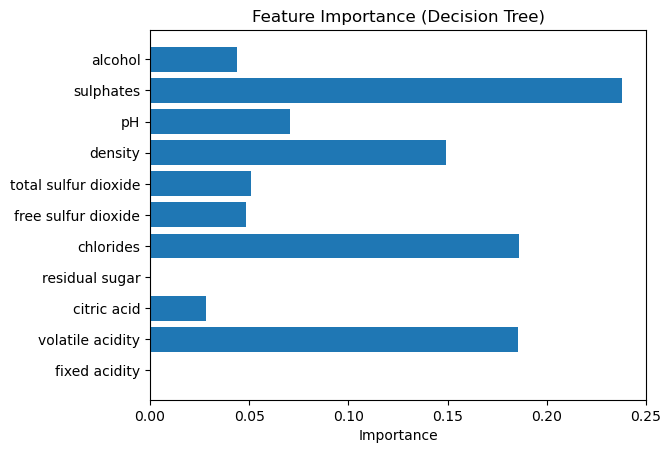

In [60]:
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance (Decision Tree)')
plt.show()

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [62]:
X = df.drop(['quality', 'is_good'], axis=1)
y = df['is_good']

In [63]:
rfe = RFE(LogisticRegression(), n_features_to_select=1)

In [64]:
rfe.fit(X, y)

C:\Users\egboc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\egboc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [65]:
selected_features_rfe = X.columns[rfe.support_].tolist()
print("Selected Features by RFE:", selected_features_rfe)

Selected Features by RFE: ['alcohol']


In [67]:
correlation_with_target = df.corr()['is_good'].sort_values(ascending=False)

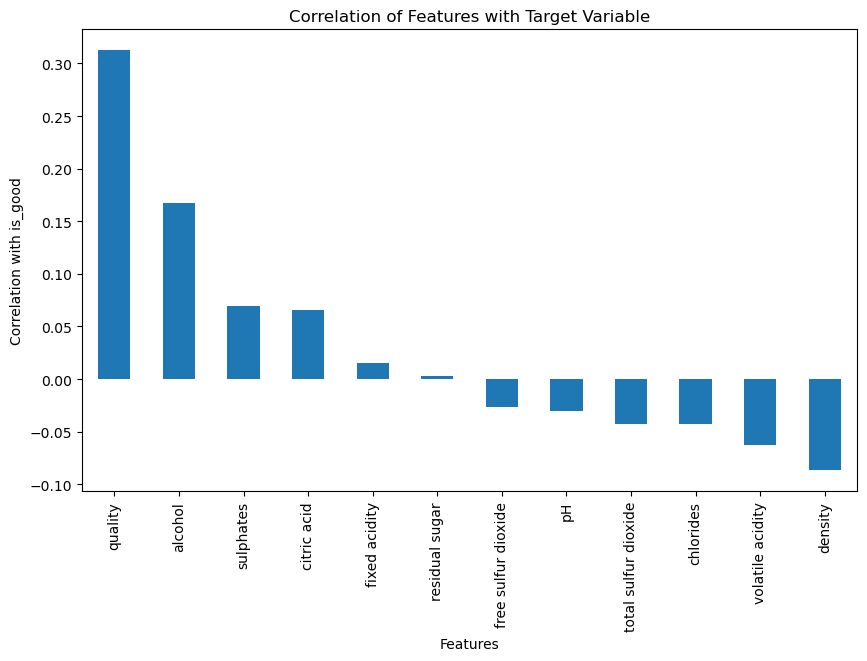

In [68]:
plt.figure(figsize=(10, 6))
correlation_with_target.drop('is_good').plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with is_good')
plt.title('Correlation of Features with Target Variable')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
accuracy_dt = dt_classifier.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.96


In [72]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
accuracy_rf = rf_classifier.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.98


In [77]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve

In [82]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [83]:
print(f"Accuracy: {accuracy:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC: {roc_auc:.2f}")

Accuracy: 0.98, Recall: 0.00, F1 Score: 0.00, AUC: 0.50


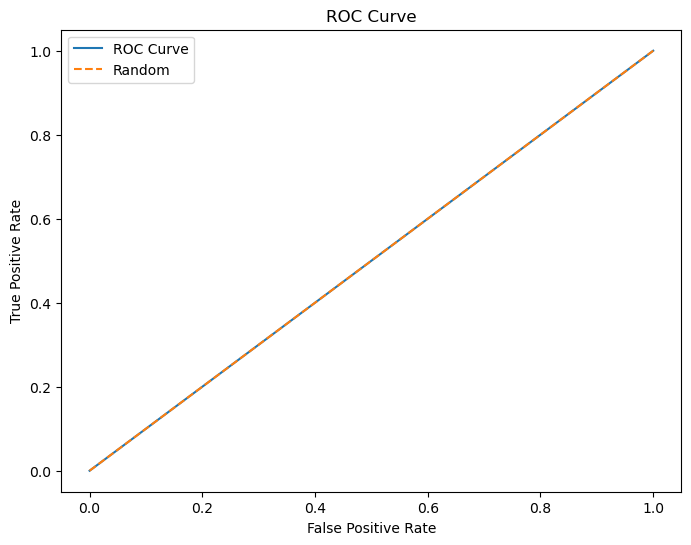

In [84]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [87]:
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: Importance - {importance:.5f}")

fixed acidity: Importance - 0.00000
volatile acidity: Importance - 0.18553
citric acid: Importance - 0.02809
residual sugar: Importance - 0.00000
chlorides: Importance - 0.18612
free sulfur dioxide: Importance - 0.04816
total sulfur dioxide: Importance - 0.05080
density: Importance - 0.14906
pH: Importance - 0.07039
sulphates: Importance - 0.23818
alcohol: Importance - 0.04366


In [88]:
most_influential_properties = [feature for feature, importance in zip(X.columns, feature_importances) if importance > 0.05]
print("Most Influential Properties:", most_influential_properties)

Most Influential Properties: ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates']
